In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 상관분석, 상관계수 
1. 상관분석 : 변수들이 서로 독립적인지 / 관계성이 있는지 알아내는 분석 방법
2. 상관계수 : 두 변수 간의 관계를 강도의 정도(0~1)와 방향(+/-)으로 요약하여 나타낸 것 
    - 상관행렬 -> 변수쌍 -> 상관계수 
    - 양수 : 두 변수 값이 같이 증가하거나 감소 (공부를 많이하면 자격증도 늘어난다. )
    - 음수 : 한 변수가 증가하면 다른 변수는 감소 (게임을 많이 하면 성적이 떨어진다.)    
3. 지수 -1 ~ +1 로 리턴 
4. spearman : 상관계수의 절대값이 클 수록 변수 사이에 강한 상관관계가 있다고 판단.
    - 완벽한 선형관계 
    - 절대값으로 랭크(순위)를 구함
    - ML 선형관계 시각화 : 원시데이터의 순위를 매길 때 사용
    - 신뢰구간을 잡고 상관계수를 통해 결과를 판단할 때 사용 

- 0.0 ~ 0.2 -> 관계가 전혀 없음
- 0.2 ~ 0.4 -> 약한 상관관계
- 0.4 ~ 0.6 -> 상관관계가 있다. 
- 0.6 ~ 0.8 -> 강한 상관관계
- 0.8 ~ 1.0 -> 매우 강한 상관관계 

## 1. 타이타닉의 상관관계를 알아보자 

In [4]:
titanic.corr(method='pearson') # 전체 상관계수 분석 (살펴보기)
# 문자열은 분석 안 됨
# 수치화된 칼럼끼리만 계산됨! 

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


## 2. 타이타닉의 상관계수 값을 리턴 받기 
survived, adult_male에 대한 상관계수 

In [6]:
titanic['survived'].corr(titanic['adult_male'], method = 'pearson') # 상관관계가 있음을 알 수 있다. 

-0.5570800422053258

## 3. 성별에 대한 생존률 관계 생각해보기 
- 중복칼럼 제거 
- 결측치 처리 
- 수치화 하기 

In [7]:
# 1. 데이터 전체 확인
# 2. 문자열이 있으면 수치화 시키기 
# 성별을 알 수 있는 sex칼럼 -> 문자열이니 수치화 시키기 
# .map(dict타입) 으로 수치화

titanic['sex'] = titanic['sex'].map({'male' : 0, 'female' : 1})
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# 3. 생존률과 성별의 상관관계 살펴보기 

titanic['survived'].corr(titanic['sex'], method = 'pearson')
# 상관관계가 있음을 알 수 있다. 

0.543351380657755

## 4. apply() 특정열 / 모든열의 값을 변경 
- df['열이름'].apply(사용자정의함수, axis = 0)

In [14]:
# apply() : 데이터 프레임에서 특정 열/행에 내가 만든 함수의 return값을 일괄적으로 적용시키고 싶을 때 사용 
# def로 함수를 먼저 정의한 후 apply()로 함수를 적용시킬 수 있음 
# 1. 사용자 정의 함수 생성

def r_age(x) :
    res = int(x//10) * 10 # 목에 10을 곱해서 정수로 만들어 연령대 생성 
    return res

# 2. 함수 적용 
# titanic['n_age'] = titanic['age'].apply(r_age) 
# 하지만 결측치가 있어서 실행이 안 됨을 알 수 있다. -> 결측치 부터 처리하기 

# 3. 결측치 처리 
age_mean = titanic['age'].mean()
titanic['age'].fillna(age_mean, inplace = True)
titanic.isnull().sum() # 결측치 처리 확인 

# 4. 다시 함수 적용 해보기 
titanic['n_age'] = titanic['age'].apply(r_age)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,n_age
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30


## 5. pd.cut(데이터, 구간개수, 레이블 명) 
- 수치형 데이터를 특정 구간을 나눌 때 사용 

In [16]:
# 나이대를 구분할 수 있는 칼럼 생성 
titanic['age_class'] = pd.cut(titanic['age'], 3, labels = ['child', 'young', 'old'])
titanic[['age', 'age_class']].head() #나이별로 구간 포함된걸 알 수 있음 

,age,age_class
0,22.0,child
1,38.0,young
2,26.0,child
3,35.0,young
4,35.0,young


## 6. 각 구간 개수 확인 _ value_counts()

In [17]:
titanic['age_class'].value_counts()

young    522
child    319
old       50
Name: age_class, dtype: int64

## 7. 나눈 구간 시각화로 확인 
[histplot 옵션]('https://blog.naver.com/PostView.naver?blogId=janghanui&logNo=222414645380&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView)

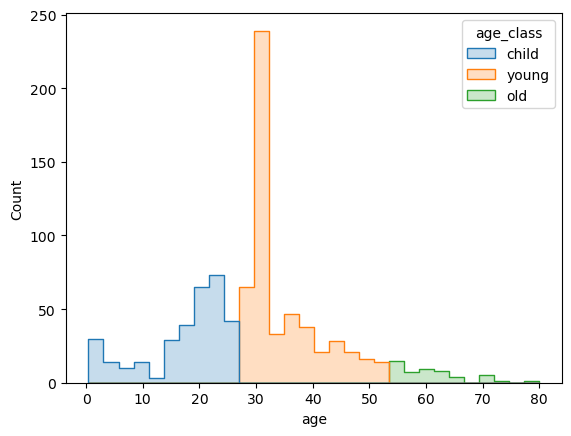

In [20]:
sns.histplot(data=titanic, x='age', hue='age_class', element = 'step') ; # hue : 구간에 따라 색을 다르게 표시

## 8. qcut() : 동일한 개수로 구간을 나눔 
- pd.qcut()

In [23]:
titanic['age_class_q'] = pd.qcut(titanic['age'], 3, labels = ['child', 'young', 'old']) # pd.cut 과 동일하게 생성
titanic[['age', 'age_class_q']]

,age,age_class_q
0,22.000000,child
1,38.000000,old
2,26.000000,young
3,35.000000,old
4,35.000000,old
...,...,...
886,27.000000,young
887,19.000000,child
888,29.699118,young
889,26.000000,young


In [24]:
# 구간별 데이터 개수 확인 
titanic['age_class_q'].value_counts() # pd.cut과 달리 개수가 거의 비슷한걸 알 수 있음 

young    304
child    301
old      286
Name: age_class_q, dtype: int64

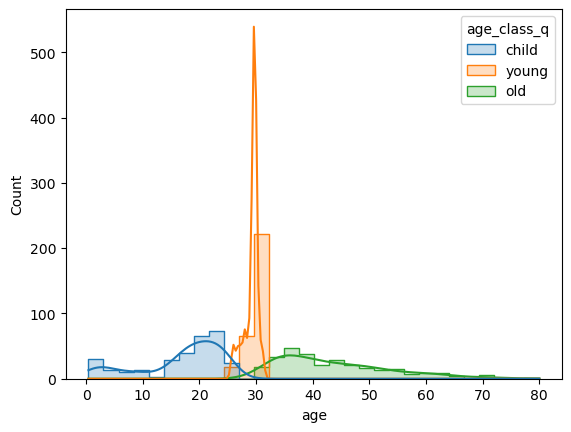

In [35]:
# pd.qcut()한 칼럼 시각화로 보기 
sns.histplot(data=titanic, x = 'age', hue = 'age_class_q',  element='step', kde=True);
# element 는 bar(s), poly, step 중에 선택 가능 
# 굴곡을 보여주는 kde=True 추가 가능 
# fill = False로 색을 비울 수도 있음 

데이터 수집 -> 데이터 정제 -> 데이터 분석 -> 데이터 시각화 
- 시각화 : 라인플롯 _ 시간변화 / 바차트 _ 비교랭킹 / 파이차트 _ 점유율 / 히스토그램 _ 분포도 / 산점도 _ 연관성 

## 1. 천만 관중을 달성한 영화를 그래프로 확인 

In [37]:
movie_df = pd.read_csv('c:\my_python\data\movies_train.csv')

In [38]:
# 천만 관중을 달성한 영화 제목 추출
천만 = movie_df[movie_df['box_off_num'] >= 10000000][['title', 'box_off_num']]
천만

,title,box_off_num
122,변호인,11374879
362,도둑들,12983841
372,국제시장,14262766
460,"광해, 왕이 된 남자",12323595
498,암살,12706663
530,7번방의 선물,12811435


In [39]:
천만1 = movie_df[['title','box_off_num']][movie_df['box_off_num'] >= 10000000]
천만1

,title,box_off_num
122,변호인,11374879
362,도둑들,12983841
372,국제시장,14262766
460,"광해, 왕이 된 남자",12323595
498,암살,12706663
530,7번방의 선물,12811435


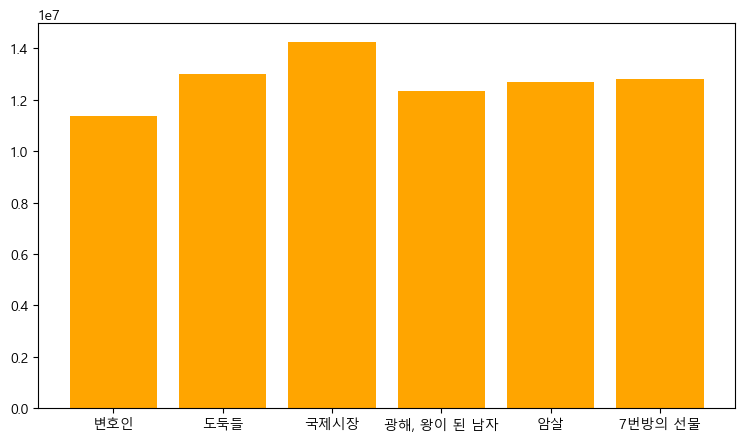

In [45]:
# 시각화로 표현 
plt.figure(figsize=(9,5)) # 그래프 크기 
plt.rc('font', family = 'Malgun Gothic') # 폰트 지정 
plt.bar(천만['title'], 천만['box_off_num'], color = 'orange') ; # 차례로 x, y 값 지정, 색 지정  